In [3]:
import pandas as pd  
red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial' +\
                                        '/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial' +\
                                        '/master/dataset/winequality-white.csv'
red_wine = pd.read_csv(red_url, sep = ';')
white_wine = pd.read_csv(white_url, sep = ';')
red_wine['color'] = 1
white_wine['color'] = 0

wine = pd.concat([red_wine, white_wine])
wine['taste'] = [1. if grade >= 5 else 0. for grade in wine['quality']]
X = wine.drop(['taste', 'quality'], axis = 1)
y = wine['taste']

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'max_depth': [2, 4, 7, 10]}
wine_tree = DecisionTreeClassifier(max_depth = 2, random_state = 13)

gridsearch = GridSearchCV(estimator = wine_tree, param_grid = params, cv = 5)
gridsearch.fit(X, y)


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=13),
             param_grid={'max_depth': [2, 4, 7, 10]})

In [5]:
import pprint
pp = pprint.PrettyPrinter(indent = 4)
pp.pprint(gridsearch.cv_results_)

{   'mean_fit_time': array([0.00706019, 0.00864124, 0.01553783, 0.01951585]),
    'mean_score_time': array([0.00161514, 0.0013258 , 0.00175385, 0.00150042]),
    'mean_test_score': array([0.96229052, 0.95936768, 0.95505762, 0.94182341]),
    'param_max_depth': masked_array(data=[2, 4, 7, 10],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object),
    'params': [   {'max_depth': 2},
                  {'max_depth': 4},
                  {'max_depth': 7},
                  {'max_depth': 10}],
    'rank_test_score': array([1, 2, 3, 4], dtype=int32),
    'split0_test_score': array([0.96230769, 0.94615385, 0.94153846, 0.90538462]),
    'split1_test_score': array([0.96076923, 0.96076923, 0.95923077, 0.95153846]),
    'split2_test_score': array([0.9630485 , 0.9630485 , 0.96073903, 0.95458045]),
    'split3_test_score': array([0.9630485 , 0.96381832, 0.95612009, 0.94611239]),
    'split4_test_score': array([0.96227868, 0.9630485 , 0.95765974, 0.9515011

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler 

estimators = [('scaler', StandardScaler()), ('clf', DecisionTreeClassifier(random_state = 13))]
pipe = Pipeline(estimators)

In [7]:
param_grid = [{'clf__max_depth': [2, 4, 7, 10]}]
GridSearch = GridSearchCV(estimator = pipe, param_grid = param_grid, cv = 5)
GridSearch.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        DecisionTreeClassifier(random_state=13))]),
             param_grid=[{'clf__max_depth': [2, 4, 7, 10]}])

In [8]:
GridSearch.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [9]:
GridSearch.best_score_

0.9622905193343992

In [10]:
GridSearch.cv_results_

{'mean_fit_time': array([0.00805459, 0.01085753, 0.01628146, 0.02142181]),
 'std_fit_time': array([0.001343  , 0.00029665, 0.00066049, 0.00074673]),
 'mean_score_time': array([0.00173073, 0.00210948, 0.00160537, 0.00163074]),
 'std_score_time': array([9.73534500e-05, 5.24827356e-04, 4.70217050e-05, 5.92889819e-05]),
 'param_clf__max_depth': masked_array(data=[2, 4, 7, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'clf__max_depth': 2},
  {'clf__max_depth': 4},
  {'clf__max_depth': 7},
  {'clf__max_depth': 10}],
 'split0_test_score': array([0.96230769, 0.94615385, 0.94153846, 0.90615385]),
 'split1_test_score': array([0.96076923, 0.96076923, 0.95923077, 0.95153846]),
 'split2_test_score': array([0.9630485 , 0.9630485 , 0.96073903, 0.95535027]),
 'split3_test_score': array([0.9630485 , 0.96381832, 0.95612009, 0.94688222]),
 'split4_test_score': array([0.96227868, 0.9630485 , 0.95765974, 0.95150115]),
 'mean_test_scor

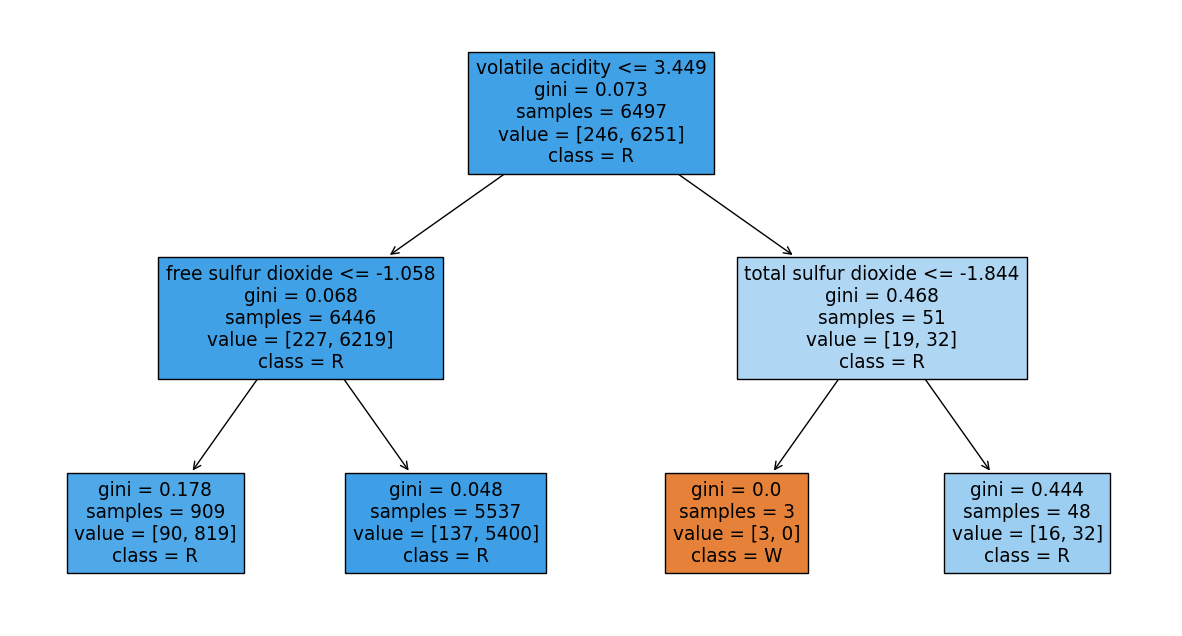

In [16]:
import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize = (15, 8))
_ = tree.plot_tree(GridSearch.best_estimator_['clf'], feature_names = list(X.columns), class_names = ['W', 'R'], filled = True)

In [12]:
import pandas as pd   
score_df = pd.DataFrame(GridSearch.cv_results_)
score_df[['params', 'rank_test_score', 'mean_test_score', 'std_test_score']]

,params,rank_test_score,mean_test_score,std_test_score
0,{'clf__max_depth': 2},1,0.962291,0.000832
1,{'clf__max_depth': 4},2,0.959368,0.006685
2,{'clf__max_depth': 7},3,0.955058,0.006933
3,{'clf__max_depth': 10},4,0.942285,0.018264
